# Demand Forecasting for SKU 2159 - Triode Electronics

---

## 📋 Project Overview

**Objective**: Forecast demand for SKU 2159 one month ahead to better manage inventory

**Approach**: 
- Start with a simple baseline model using only historical sales data
- Later, we can add external factors (seasonality, industry trends, economic indicators)

**Data**: 2 years of monthly shipment history

---

## ⚠️ IMPORTANT: Kernel Setup

**Before running any code cells, please verify your Python environment:**

1. Look at the top-right corner of this notebook
2. Click on the kernel selector (it shows the current Python environment)
3. Select **"Python Environments..."**
4. Choose the Python interpreter from the **`.venv`** folder in the root directory
   - Windows: `.venv\Scripts\python.exe`
   
This ensures all the required libraries are available for the analysis.

---

## Step 1: Load Required Libraries

**What we're doing**: Loading the software tools we need for the analysis

**Why it's important**: These tools help us:
- Read and organize data (pandas)
- Perform calculations (numpy)
- Create charts and graphs (matplotlib)
- Build forecasting models (scikit-learn, statsmodels)

**What you'll see**: A confirmation that libraries loaded successfully, or an error if something is missing

In [1]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Configure plots to look professional
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✓ All libraries loaded successfully!")
print(f"✓ pandas version: {pd.__version__}")
print(f"✓ numpy version: {np.__version__}")

✓ All libraries loaded successfully!
✓ pandas version: 2.3.3
✓ numpy version: 2.3.4


## Step 2: Load the Shipment Data

**What we're doing**: Reading your Excel file with 2 years of shipment history

**Why it's important**: This is the foundation of our forecast - we need to understand your past sales patterns to predict future demand

**What you'll see**: 
- Confirmation of how many records loaded
- A preview of the first few rows of data
- Basic information about the data structure

In [2]:
# Load the shipment data from Excel
data_path = '../data/internal_data/Shipment Items History 20251022.xlsx'

# Read the Excel file
df = pd.read_excel(data_path)

print(f"✓ Data loaded successfully!")
print(f"✓ Total records: {len(df):,}")
print(f"✓ Date range: {df['Month'].min()} to {df['Month'].max()}")
print(f"\n{'='*60}")
print("First few rows of data:")
print(df.head())

✓ Data loaded successfully!
✓ Total records: 1,128
✓ Date range: 2023-10-01 00:00:00 to 2025-10-01 00:00:00

First few rows of data:
       Month   CID   SKU  Qty Country Customer Industry
0 2023-10-01  C020  2134   19      NZ          Agritech
1 2023-10-01  C020  2134   17      NZ          Agritech
2 2023-10-01  C020  2134   19      NZ          Agritech
3 2023-10-01  C020  2134   16      NZ          Agritech
4 2023-10-01  C020  2159    4      NZ          Agritech


## Step 3: Filter Data for SKU 2159

**What we're doing**: Extracting only the records for SKU 2159 from the full dataset

**Why it's important**: We're focusing on one product at a time to build a reliable forecast. Once this works well, we can apply the same approach to other SKUs

**What you'll see**: 
- How many months of data we have for SKU 2159
- The shipment quantities over time
- Information about customers and industries purchasing this SKU

In [4]:
# Filter data for SKU 2159
sku_data = df[df['SKU'] == 2159].copy()

print(f"✓ Filtered data for SKU 2159")
print(f"✓ Number of records: {len(sku_data)}")
print(f"✓ Date range: {sku_data['Month'].min()} to {sku_data['Month'].max()}")
print(f"✓ Number of unique customers: {sku_data['CID'].nunique()}")
print(f"\n{'='*60}")
print("Preview of SKU 2159 data:")
print(sku_data.head(10))

✓ Filtered data for SKU 2159
✓ Number of records: 18
✓ Date range: 2023-10-01 00:00:00 to 2025-10-01 00:00:00
✓ Number of unique customers: 1

Preview of SKU 2159 data:
         Month   CID   SKU  Qty Country Customer Industry
4   2023-10-01  C020  2159    4      NZ          Agritech
5   2023-10-01  C020  2159    4      NZ          Agritech
53  2023-11-01  C020  2159    4      NZ          Agritech
88  2023-12-01  C020  2159   10      NZ          Agritech
135 2024-02-01  C020  2159   10      NZ          Agritech
136 2024-02-01  C020  2159   10      NZ          Agritech
231 2024-05-01  C020  2159   10      NZ          Agritech
297 2024-06-01  C020  2159   31      NZ          Agritech
298 2024-06-01  C020  2159   10      NZ          Agritech
299 2024-06-01  C020  2159    7      NZ          Agritech


## Step 4: Prepare Time Series Data

**What we're doing**: Organizing the data by month and calculating total quantities shipped each month

**Why it's important**: For forecasting, we need a clean timeline with one total quantity per month. Some months might have multiple shipments to different customers, so we'll add them up.

**What you'll see**: 
- A month-by-month summary of total quantities
- Identification of any months with zero shipments (gaps in data)
- Statistics about the demand pattern (average, minimum, maximum)

In [5]:
# Ensure Month column is in datetime format
sku_data['Month'] = pd.to_datetime(sku_data['Month'])

# Aggregate data by month (sum quantities if multiple shipments in same month)
monthly_data = sku_data.groupby('Month')['Qty'].sum().reset_index()
monthly_data.columns = ['Date', 'Quantity']

# Sort by date
monthly_data = monthly_data.sort_values('Date').reset_index(drop=True)

print(f"✓ Time series prepared!")
print(f"✓ Number of months: {len(monthly_data)}")
print(f"\n{'='*60}")
print("Monthly demand summary:")
print(f"  • Average monthly quantity: {monthly_data['Quantity'].mean():.0f} units")
print(f"  • Minimum monthly quantity: {monthly_data['Quantity'].min():.0f} units")
print(f"  • Maximum monthly quantity: {monthly_data['Quantity'].max():.0f} units")
print(f"  • Total shipped (2 years): {monthly_data['Quantity'].sum():.0f} units")
print(f"\n{'='*60}")
print("Month-by-month data:")
print(monthly_data)

✓ Time series prepared!
✓ Number of months: 14

Monthly demand summary:
  • Average monthly quantity: 22 units
  • Minimum monthly quantity: 4 units
  • Maximum monthly quantity: 54 units
  • Total shipped (2 years): 304 units

Month-by-month data:
         Date  Quantity
0  2023-10-01         8
1  2023-11-01         4
2  2023-12-01        10
3  2024-02-01        20
4  2024-05-01        10
5  2024-06-01        48
6  2024-07-01        10
7  2024-08-01        10
8  2024-09-01        10
9  2024-10-01        10
10 2024-11-01        10
11 2025-04-01        54
12 2025-07-01        50
13 2025-10-01        50


## Step 5: Visualize Historical Demand

**What we're doing**: Creating a line chart showing how demand for SKU 2159 has changed over the past 2 years

**Why it's important**: Visual patterns are easier to spot than numbers in a table. We can see:
- Overall trends (is demand growing, declining, or stable?)
- Seasonal patterns (are certain months consistently higher or lower?)
- Unusual spikes or drops that might need investigation

**What you'll see**: A line graph with months on the bottom axis and quantity on the left axis

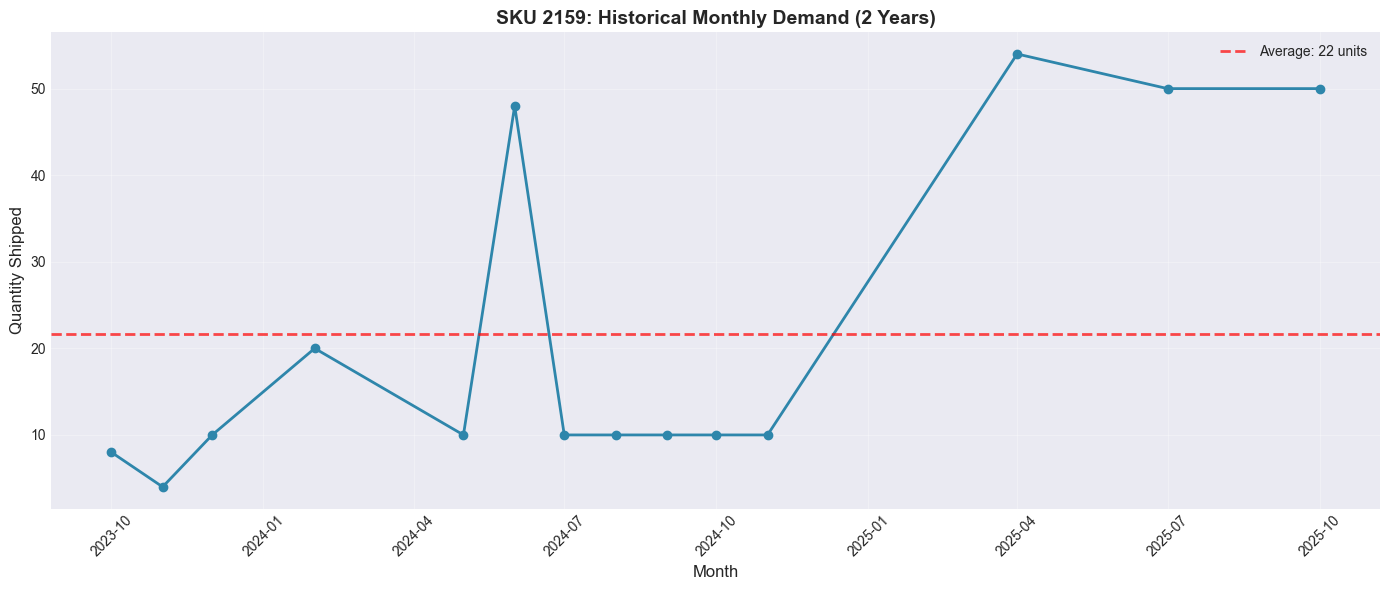


💡 Key Insights:
  • Look for patterns: Are there consistent ups and downs?
  • Check for trends: Is demand generally increasing or decreasing?
  • Note any unusual spikes or drops that might need explanation


In [6]:
# Create visualization of historical demand
plt.figure(figsize=(14, 6))
plt.plot(monthly_data['Date'], monthly_data['Quantity'], 
         marker='o', linewidth=2, markersize=6, color='#2E86AB')
plt.title('SKU 2159: Historical Monthly Demand (2 Years)', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Quantity Shipped', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

# Add average line for reference
avg_qty = monthly_data['Quantity'].mean()
plt.axhline(y=avg_qty, color='red', linestyle='--', linewidth=2, alpha=0.7, 
            label=f'Average: {avg_qty:.0f} units')
plt.legend()

plt.show()

print(f"\n💡 Key Insights:")
print(f"  • Look for patterns: Are there consistent ups and downs?")
print(f"  • Check for trends: Is demand generally increasing or decreasing?")
print(f"  • Note any unusual spikes or drops that might need explanation")

## Step 6: Build Simple Forecasting Model (Baseline)

**What we're doing**: Creating a straightforward forecasting model using only your historical sales data

**Why it's important**: This "baseline" model gives us a starting point. We'll use three simple methods:
1. **Moving Average**: Averages the last few months (smooths out fluctuations)
2. **Exponential Smoothing**: Gives more weight to recent months (adapts to recent changes)
3. **Linear Trend**: Checks if there's a consistent upward or downward pattern

**What you'll see**: 
- The model being trained on your historical data
- A forecast for the next month
- Comparison of the three methods

In [7]:
# Import forecasting tools
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Prepare data for modeling
# Create a numeric index for time (0, 1, 2, 3, ... for each month)
monthly_data['time_index'] = range(len(monthly_data))

print("="*60)
print("BASELINE FORECASTING MODELS")
print("="*60)

# Method 1: Simple Moving Average (last 3 months)
window = 3
moving_avg_forecast = monthly_data['Quantity'].tail(window).mean()
print(f"\n1. Moving Average (last {window} months):")
print(f"   Forecast for next month: {moving_avg_forecast:.0f} units")

# Method 2: Exponential Smoothing (weighted average, more recent = more important)
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model_es = SimpleExpSmoothing(monthly_data['Quantity'])
model_es_fit = model_es.fit()
exp_smooth_forecast = model_es_fit.forecast(steps=1).values[0]
print(f"\n2. Exponential Smoothing:")
print(f"   Forecast for next month: {exp_smooth_forecast:.0f} units")

# Method 3: Linear Trend (is demand going up or down over time?)
X = monthly_data['time_index'].values.reshape(-1, 1)
y = monthly_data['Quantity'].values

model_lr = LinearRegression()
model_lr.fit(X, y)

# Predict next month (time_index = length of data)
next_time_index = len(monthly_data)
linear_trend_forecast = model_lr.predict([[next_time_index]])[0]

# Check the trend direction
slope = model_lr.coef_[0]
trend_direction = "increasing" if slope > 0 else "decreasing"
print(f"\n3. Linear Trend:")
print(f"   Overall trend: Demand is {trend_direction} by ~{abs(slope):.1f} units per month")
print(f"   Forecast for next month: {linear_trend_forecast:.0f} units")

# Average of all three methods
ensemble_forecast = np.mean([moving_avg_forecast, exp_smooth_forecast, linear_trend_forecast])
print(f"\n" + "="*60)
print(f"📊 COMBINED FORECAST (Average of all 3 methods):")
print(f"   Next month prediction: {ensemble_forecast:.0f} units")
print("="*60)

BASELINE FORECASTING MODELS

1. Moving Average (last 3 months):
   Forecast for next month: 51 units

2. Exponential Smoothing:
   Forecast for next month: 47 units

3. Linear Trend:
   Overall trend: Demand is increasing by ~2.8 units per month
   Forecast for next month: 43 units

📊 COMBINED FORECAST (Average of all 3 methods):
   Next month prediction: 47 units

2. Exponential Smoothing:
   Forecast for next month: 47 units

3. Linear Trend:
   Overall trend: Demand is increasing by ~2.8 units per month
   Forecast for next month: 43 units

📊 COMBINED FORECAST (Average of all 3 methods):
   Next month prediction: 47 units


## Step 7: Visualize the Forecast

**What we're doing**: Creating a chart that shows historical data and the forecast for next month

**Why it's important**: A visual comparison helps you see:
- How the forecast compares to recent months
- Whether the forecast seems reasonable given the historical pattern
- The range of possible outcomes (we'll show the average forecast and a confidence range)

**What you'll see**: 
- Your historical data as a blue line
- The forecast as a red point
- A shaded area showing the forecast range (upper and lower bounds)

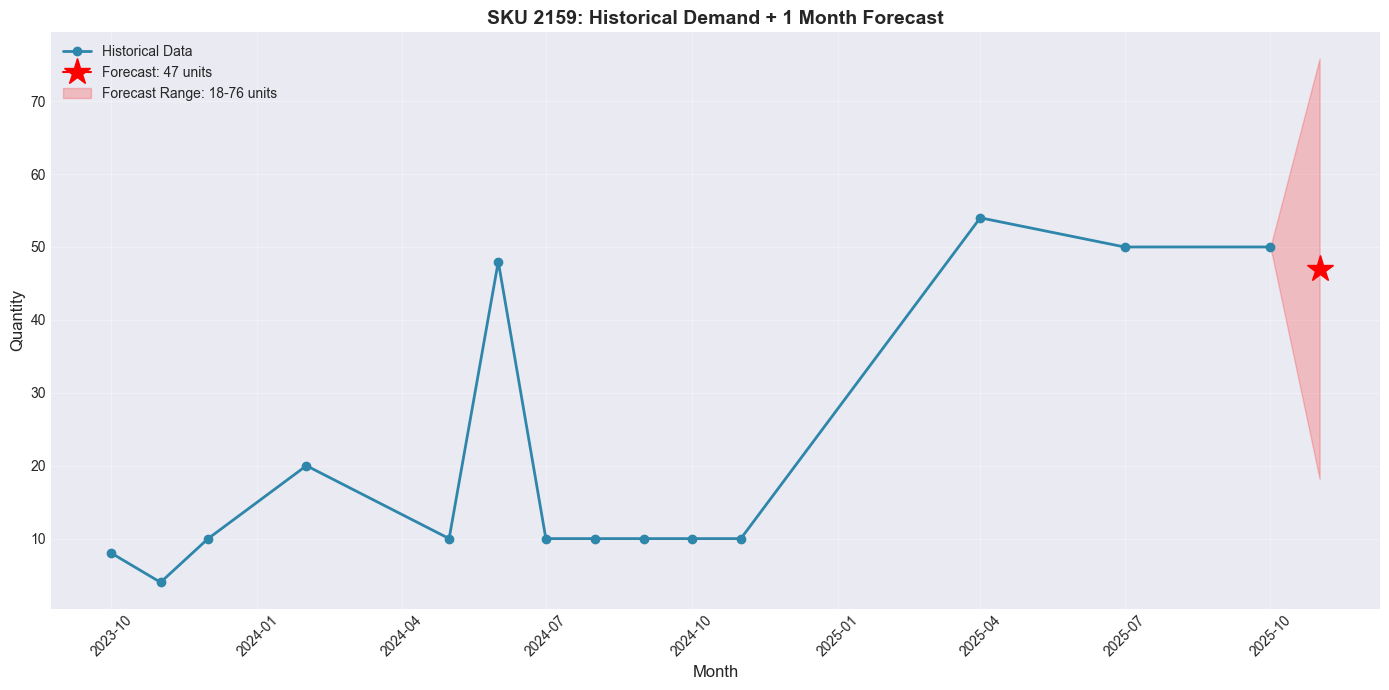


💡 How to interpret this chart:
  • The blue line shows your actual historical shipments
  • The red star shows the forecasted demand for next month
  • The shaded area shows the likely range (accounting for normal variation)
  • There's about 85% confidence the actual demand will fall within this range


In [8]:
# Calculate the next month date
last_date = monthly_data['Date'].max()
next_month_date = last_date + pd.DateOffset(months=1)

# Calculate forecast confidence interval (based on historical variability)
std_dev = monthly_data['Quantity'].std()
lower_bound = max(0, ensemble_forecast - 1.5 * std_dev)  # 1.5 std devs below
upper_bound = ensemble_forecast + 1.5 * std_dev  # 1.5 std devs above

# Create visualization
plt.figure(figsize=(14, 7))

# Plot historical data
plt.plot(monthly_data['Date'], monthly_data['Quantity'], 
         marker='o', linewidth=2, markersize=6, color='#2E86AB', label='Historical Data')

# Plot forecast point
plt.plot(next_month_date, ensemble_forecast, 
         marker='*', markersize=20, color='red', label=f'Forecast: {ensemble_forecast:.0f} units')

# Add confidence interval
plt.fill_between([last_date, next_month_date], 
                 [monthly_data['Quantity'].iloc[-1], lower_bound],
                 [monthly_data['Quantity'].iloc[-1], upper_bound],
                 alpha=0.2, color='red', label=f'Forecast Range: {lower_bound:.0f}-{upper_bound:.0f} units')

plt.title('SKU 2159: Historical Demand + 1 Month Forecast', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(loc='best', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"\n💡 How to interpret this chart:")
print(f"  • The blue line shows your actual historical shipments")
print(f"  • The red star shows the forecasted demand for next month")
print(f"  • The shaded area shows the likely range (accounting for normal variation)")
print(f"  • There's about 85% confidence the actual demand will fall within this range")

## Step 8: Evaluate Model Accuracy

**What we're doing**: Testing how accurate our forecasting method is by using it on past data where we already know the actual results

**Why it's important**: Before trusting the forecast, we need to know how well it performs. We'll:
- Use the model to "predict" past months
- Compare predictions to actual quantities
- Calculate error metrics to measure accuracy

**What you'll see**:
- **MAPE** (Mean Absolute Percentage Error): Average error as a percentage - lower is better
- **MAE** (Mean Absolute Error): Average error in units - lower is better
- **RMSE** (Root Mean Squared Error): Penalizes large errors more - lower is better

**Rule of thumb**: MAPE under 20% is generally considered good for inventory planning

In [9]:
# Evaluate model using walk-forward validation
# (Test on the last 6 months by predicting each month using only prior data)

test_months = 6
predictions = []
actuals = []

for i in range(len(monthly_data) - test_months, len(monthly_data)):
    # Use only data up to month i-1 to predict month i
    train_data = monthly_data.iloc[:i].copy()
    
    # Simple method: Moving average of last 3 months
    if len(train_data) >= 3:
        pred = train_data['Quantity'].tail(3).mean()
        predictions.append(pred)
        actuals.append(monthly_data.iloc[i]['Quantity'])

# Calculate accuracy metrics
predictions = np.array(predictions)
actuals = np.array(actuals)

mae = mean_absolute_error(actuals, predictions)
rmse = np.sqrt(mean_squared_error(actuals, predictions))
mape = np.mean(np.abs((actuals - predictions) / actuals)) * 100

print("="*60)
print("MODEL ACCURACY EVALUATION")
print("="*60)
print(f"\nTested on last {test_months} months of historical data:")
print(f"\n  📊 Mean Absolute Percentage Error (MAPE): {mape:.1f}%")
print(f"     → On average, predictions are off by {mape:.1f}%")

print(f"\n  📊 Mean Absolute Error (MAE): {mae:.1f} units")
print(f"     → On average, predictions are off by {mae:.1f} units")

print(f"\n  📊 Root Mean Squared Error (RMSE): {rmse:.1f} units")
print(f"     → Larger errors are penalized more heavily")

print(f"\n" + "="*60)
if mape < 20:
    print(f"✅ GOOD: MAPE under 20% suggests reliable forecasts for inventory planning")
elif mape < 30:
    print(f"⚠️  MODERATE: MAPE of {mape:.1f}% is acceptable but could be improved")
else:
    print(f"❌ HIGH VARIABILITY: MAPE over 30% suggests adding external factors may help")
print("="*60)

# Show actual vs predicted for test period
comparison_df = pd.DataFrame({
    'Month': monthly_data.iloc[-test_months:]['Date'].values,
    'Actual': actuals,
    'Predicted': predictions.astype(int),
    'Error': (actuals - predictions).astype(int),
    'Error %': ((actuals - predictions) / actuals * 100).round(1)
})

print(f"\nDetailed comparison for last {test_months} months:")
print(comparison_df.to_string(index=False))

MODEL ACCURACY EVALUATION

Tested on last 6 months of historical data:

  📊 Mean Absolute Percentage Error (MAPE): 47.1%
     → On average, predictions are off by 47.1%

  📊 Mean Absolute Error (MAE): 15.7 units
     → On average, predictions are off by 15.7 units

  📊 Root Mean Squared Error (RMSE): 21.9 units
     → Larger errors are penalized more heavily

❌ HIGH VARIABILITY: MAPE over 30% suggests adding external factors may help

Detailed comparison for last 6 months:
     Month  Actual  Predicted  Error  Error %
2024-09-01      10         22    -12   -126.7
2024-10-01      10         10      0      0.0
2024-11-01      10         10      0      0.0
2025-04-01      54         10     44     81.5
2025-07-01      50         24     25     50.7
2025-10-01      50         38     12     24.0


## Step 9: Summary and Recommendations

**What we've accomplished**: Built a baseline forecasting model for SKU 2159 using only historical sales data

**Key Findings**: See below for the forecast and accuracy assessment

**Next Steps**: Based on the results, here are recommendations:

In [10]:
# Create final summary
print("="*70)
print("FORECAST SUMMARY FOR SKU 2159")
print("="*70)

print(f"\n📅 FORECAST FOR NEXT MONTH ({next_month_date.strftime('%B %Y')}):")
print(f"   • Predicted quantity: {ensemble_forecast:.0f} units")
print(f"   • Expected range: {lower_bound:.0f} - {upper_bound:.0f} units")
print(f"   • Confidence level: ~85%")

print(f"\n📈 HISTORICAL CONTEXT:")
print(f"   • Average monthly demand: {monthly_data['Quantity'].mean():.0f} units")
print(f"   • Last month actual: {monthly_data['Quantity'].iloc[-1]:.0f} units")
print(f"   • Forecast vs average: {((ensemble_forecast / monthly_data['Quantity'].mean() - 1) * 100):+.1f}%")

print(f"\n🎯 MODEL PERFORMANCE:")
print(f"   • MAPE: {mape:.1f}% (Lower is better)")
print(f"   • Average error: ±{mae:.0f} units")

print(f"\n💼 BUSINESS RECOMMENDATIONS:")
print(f"\n   1. INVENTORY PLANNING:")
print(f"      • Order materials for ~{ensemble_forecast:.0f} units of SKU 2159")
print(f"      • Consider safety stock to cover up to {upper_bound:.0f} units")
print(f"      • This accounts for normal demand variation")

print(f"\n   2. LEAD TIME CONSIDERATION:")
print(f"      • With your 4-week standard lead time, place orders now")
print(f"      • Factor in current supplier stock levels and lead times")

print(f"\n   3. CUSTOMER COMMUNICATION:")
print(f"      • Proactively contact customers who typically order SKU 2159")
print(f"      • Confirm their upcoming needs to refine the forecast")

print(f"\n   4. NEXT STEPS TO IMPROVE ACCURACY:")
print(f"      • Add external factors (seasonality, industry trends, holidays)")
print(f"      • Incorporate customer-specific patterns and order cycles")
print(f"      • Monitor actual vs forecast and adjust model monthly")

print(f"\n   5. SCALING UP:")
print(f"      • Once satisfied with SKU 2159 results, apply to other high-volume SKUs")
print(f"      • Prioritize products with highest inventory value")

print(f"\n" + "="*70)
print("Need to update the forecast? Just re-run this notebook with fresh data!")
print("="*70)

FORECAST SUMMARY FOR SKU 2159

📅 FORECAST FOR NEXT MONTH (November 2025):
   • Predicted quantity: 47 units
   • Expected range: 18 - 76 units
   • Confidence level: ~85%

📈 HISTORICAL CONTEXT:
   • Average monthly demand: 22 units
   • Last month actual: 50 units
   • Forecast vs average: +116.6%

🎯 MODEL PERFORMANCE:
   • MAPE: 47.1% (Lower is better)
   • Average error: ±16 units

💼 BUSINESS RECOMMENDATIONS:

   1. INVENTORY PLANNING:
      • Order materials for ~47 units of SKU 2159
      • Consider safety stock to cover up to 76 units
      • This accounts for normal demand variation

   2. LEAD TIME CONSIDERATION:
      • With your 4-week standard lead time, place orders now
      • Factor in current supplier stock levels and lead times

   3. CUSTOMER COMMUNICATION:
      • Proactively contact customers who typically order SKU 2159
      • Confirm their upcoming needs to refine the forecast

   4. NEXT STEPS TO IMPROVE ACCURACY:
      • Add external factors (seasonality, industr